# FPGheArt - Week 2 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import time

### Data (strings) and splitting

In [2]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter=',',
                   usecols= (0,1), unpack=True, dtype = str)

In [3]:
N = len(sy)
print(f"Number of total samples {N}")
Ls = len(sx[0])
print(f"Lenght of a sample {Ls}")

print(f"Sample: {sx[0]}, label: {sy[0]}")

perc_train = 0.8
N_train = int(N*perc_train)
N_test = N -N_train
print(f'\ndata:{N}\ntrain: {N_train}\ntest: {N_test}')

Number of total samples 3000
Lenght of a sample 16
Sample: AAGGTCTGCCGGCCGA, label: 1

data:3000
train: 2400
test: 600


In [4]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc = {Q[i]: i for i in range(Nc)}
print(f"One-hot encoding dictionary: {onehc}")

One-hot encoding dictionary: {'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion: One-Hot Encoding



In [5]:
y = sy.astype(int)

L = Ls*Nc
print(f"Product of lenght ({Ls}) and character possibilities ({Nc}): {L}\n")

x= np.zeros((N,L))

for n in range(N):
    for i in range(Ls):
        x[n][i*4 + onehc[sx[n][i]]] = 1
print(f"Original sequence:\n {sx[0]}\n")
print(f"Encoded sequence:\n {x[0]}")

Product of lenght (16) and character possibilities (4): 64

Original sequence:
 AAGGTCTGCCGGCCGA

Encoded sequence:
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


### Split train/test - validation

In [6]:
(x_train, y_train) = (x[:N_train], y[:N_train])
(x_test, y_test) = (x[N_train:], y[N_train:])
print(f"Ratio between y_train labels sum and train samples: {y_train.sum() / N_train}")
print(f"Ratio between y_test  labels sum and test samples: {y_test.sum() / N_test}")


Ratio between y_train labels sum and train samples: 0.24333333333333335
Ratio between y_test  labels sum and test samples: 0.25833333333333336


### Definition of model in Keras

In [7]:
np.random.seed(123)

model = Sequential()

model.add(Dense(L,input_shape=(L,),activation = "relu"))
model.add(Dense(L/2,activation = "relu"))
model.add(Dense(L/4,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics= ["accuracy"])

In [9]:
fit = model.fit(x_train, y_train,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)


Epoch 1/30
48/48 [==============================] - 2s 16ms/step - loss: 0.6092 - accuracy: 0.7332 - val_loss: 0.5556 - val_accuracy: 0.7417
Epoch 2/30
48/48 [==============================] - 0s 7ms/step - loss: 0.5280 - accuracy: 0.7601 - val_loss: 0.5301 - val_accuracy: 0.7417
Epoch 3/30
48/48 [==============================] - 0s 7ms/step - loss: 0.5178 - accuracy: 0.7456 - val_loss: 0.5123 - val_accuracy: 0.7417
Epoch 4/30
48/48 [==============================] - 0s 7ms/step - loss: 0.4568 - accuracy: 0.7707 - val_loss: 0.4975 - val_accuracy: 0.7500
Epoch 5/30
48/48 [==============================] - 0s 7ms/step - loss: 0.4661 - accuracy: 0.7596 - val_loss: 0.5049 - val_accuracy: 0.7533
Epoch 6/30
48/48 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.7870 - val_loss: 0.4829 - val_accuracy: 0.7533
Epoch 7/30
48/48 [==============================] - 0s 7ms/step - loss: 0.4009 - accuracy: 0.8144 - val_loss: 0.4906 - val_accuracy: 0.7500
Epoch 8/30
48/48 [=

19/19 [==============================] - 0s 5ms/step - loss: 1.2084 - accuracy: 0.7700
Final Test loss: 1.2083771228790283
Final Test accuracy: 0.7699999809265137


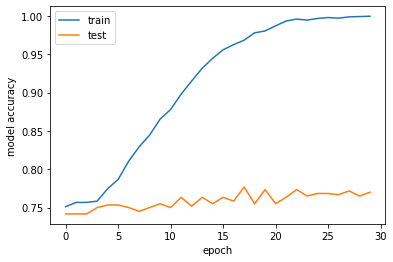

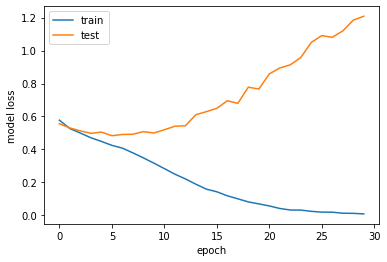

In [10]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Final Test loss:', score[0])
print('Final Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Data augmentation

In [11]:
augval = np.asarray([[[v[-i:] + v[:-i],vy] for i in range(16)] for v,vy in zip(sx[:N_train],y[:N_train])]).reshape(38400,2)
augsx = augval[:,0]
augy_train = augval[:,1].astype(int)

In [12]:
augx_train = np.zeros((N_train*16,L))

for n in range(N_train*16):
    for i in range(Ls):
        augx_train[n][i*4 + onehc[augsx[n][i]]] = 1
aug_N_train = N_train*16


### Split train/test - validation

In [13]:
fit2 = model.fit(augx_train, augy_train,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)


Epoch 1/30
768/768 [==============================] - 5s 6ms/step - loss: 0.4360 - accuracy: 0.8093 - val_loss: 0.3632 - val_accuracy: 0.8217
Epoch 2/30
768/768 [==============================] - 5s 6ms/step - loss: 0.3525 - accuracy: 0.8472 - val_loss: 0.3153 - val_accuracy: 0.8600
Epoch 3/30
768/768 [==============================] - 4s 6ms/step - loss: 0.3127 - accuracy: 0.8692 - val_loss: 0.2932 - val_accuracy: 0.8750
Epoch 4/30
768/768 [==============================] - 4s 5ms/step - loss: 0.2851 - accuracy: 0.8857 - val_loss: 0.2806 - val_accuracy: 0.8800
Epoch 5/30
768/768 [==============================] - 4s 5ms/step - loss: 0.2662 - accuracy: 0.8955 - val_loss: 0.2784 - val_accuracy: 0.8833
Epoch 6/30
768/768 [==============================] - 4s 5ms/step - loss: 0.2547 - accuracy: 0.9010 - val_loss: 0.2677 - val_accuracy: 0.8817
Epoch 7/30
768/768 [==============================] - 4s 5ms/step - loss: 0.2444 - accuracy: 0.9077 - val_loss: 0.2751 - val_accuracy: 0.8817
Epoch 

19/19 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.8883

Test loss: 0.2940090298652649
Test accuracy: 0.8883333206176758


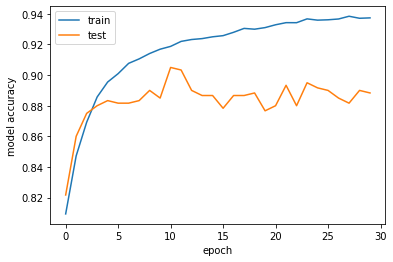

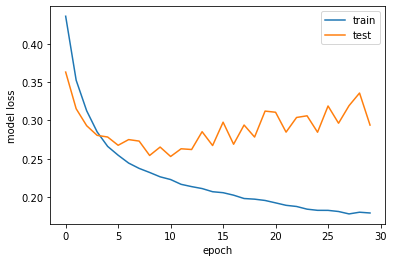

In [14]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit2.history['accuracy'])
plt.plot(fit2.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit2.history['loss'])
plt.plot(fit2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## GridSearch

In [ ]:
def create_DNN(activation, dropout_rate):
    model = Sequential()

    model.add(Dense(L,input_shape=(L,),activation = activation))
    model.add(Dense(L/2,activation = activation))
    model.add(Dense(L/4,activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model


In [ ]:
def compile_model(optimizer=keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2):
    # create the mode
    model=create_DNN(activation, dropout_rate)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


In [ ]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=30, batch_size = 50, shuffle = True)


## Rescaling Data

In [18]:
augx_train_c = augx_train.copy()
augx_train_c[augx_train_c==0]=-0.25
augx_train_c[augx_train_c==1]=0.75
x_test_c = x_test.copy()
x_test_c[x_test_c==0]=-0.25
x_test_c[x_test_c==1]=0.75
print(augx_train_c)

[[ 0.75 -0.25 -0.25 ... -0.25 -0.25 -0.25]
 [ 0.75 -0.25 -0.25 ... -0.25  0.75 -0.25]
 [-0.25 -0.25  0.75 ...  0.75 -0.25 -0.25]
 ...
 [-0.25 -0.25 -0.25 ... -0.25 -0.25 -0.25]
 [ 0.75 -0.25 -0.25 ... -0.25 -0.25  0.75]
 [-0.25 -0.25 -0.25 ... -0.25 -0.25  0.75]]


In [22]:
fit_c = model.fit(augx_train_c, augy_train,
                epochs=30, batch_size = 50, validation_data = (x_test_c, y_test), shuffle = True,)


Epoch 1/30
768/768 [==============================] - 4s 5ms/step - loss: 0.2524 - accuracy: 0.9080 - val_loss: 0.2888 - val_accuracy: 0.8917
Epoch 2/30
768/768 [==============================] - 4s 6ms/step - loss: 0.1987 - accuracy: 0.9279 - val_loss: 0.3056 - val_accuracy: 0.8783
Epoch 3/30
768/768 [==============================] - 4s 5ms/step - loss: 0.1864 - accuracy: 0.9344 - val_loss: 0.2783 - val_accuracy: 0.8967
Epoch 4/30
768/768 [==============================] - 4s 5ms/step - loss: 0.1813 - accuracy: 0.9360 - val_loss: 0.3123 - val_accuracy: 0.8900
Epoch 5/30
768/768 [==============================] - 4s 5ms/step - loss: 0.1760 - accuracy: 0.9390 - val_loss: 0.2860 - val_accuracy: 0.9033
Epoch 6/30
768/768 [==============================] - 4s 5ms/step - loss: 0.1722 - accuracy: 0.9404 - val_loss: 0.2873 - val_accuracy: 0.9033
Epoch 7/30
768/768 [==============================] - 4s 5ms/step - loss: 0.1714 - accuracy: 0.9405 - val_loss: 0.2924 - val_accuracy: 0.8950
Epoch 

19/19 [==============================] - 0s 5ms/step - loss: 1.4775 - accuracy: 0.7883
Final Test loss: 1.4774651527404785
Final Test accuracy: 0.7883333563804626


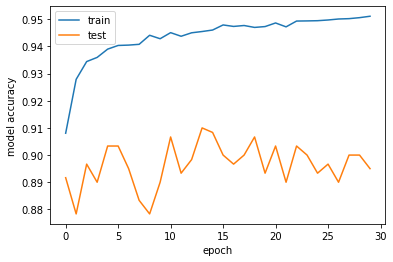

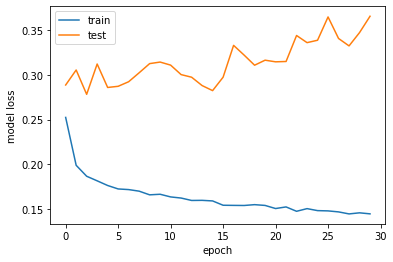

In [36]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Final Test loss:', score[0])
print('Final Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit_c.history['accuracy'])
plt.plot(fit_c.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_c.history['loss'])
plt.plot(fit_c.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Prova

In [33]:
new_sx = [list(s) for s in sx]

In [53]:
df = pd.DataFrame(new_sx)

In [60]:
frac = np.array([(1/3000*np.array(df[i].value_counts())) for i in range(16)])
frac

array([[0.263     , 0.25366667, 0.24633333, 0.237     ],
       [0.26066667, 0.25066667, 0.24666667, 0.242     ],
       [0.25533333, 0.255     , 0.253     , 0.23666667],
       [0.253     , 0.25166667, 0.249     , 0.24633333],
       [0.26166667, 0.24933333, 0.247     , 0.242     ],
       [0.25333333, 0.25066667, 0.25      , 0.246     ],
       [0.25733333, 0.25533333, 0.24433333, 0.243     ],
       [0.25666667, 0.25233333, 0.25133333, 0.23966667],
       [0.254     , 0.251     , 0.25033333, 0.24466667],
       [0.26533333, 0.24933333, 0.248     , 0.23733333],
       [0.25533333, 0.25333333, 0.24866667, 0.24266667],
       [0.256     , 0.254     , 0.252     , 0.238     ],
       [0.265     , 0.252     , 0.244     , 0.239     ],
       [0.25833333, 0.25366667, 0.253     , 0.235     ],
       [0.25466667, 0.25      , 0.24766667, 0.24766667],
       [0.26033333, 0.25033333, 0.24833333, 0.241     ]])

In [52]:
df[df == 'A'].fillna(0)
df[df == 'A'] = 1

## 15 DNA basis

Ratio between y_train labels sum and train samples: 0.24333333333333335
Ratio between y_test  labels sum and test samples: 0.25833333333333336
[[ 1.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    1.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-0.25 -0.25 -0.25 ... -0.25 -0.25 -0.25]
 [-0.25 -0.25  0.75 ... -0.25 -0.25  0.75]
 [-0.25  0.75 -0.25 ... -0.25 -0.25 -0.25]]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)    

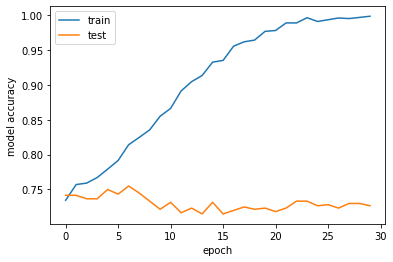

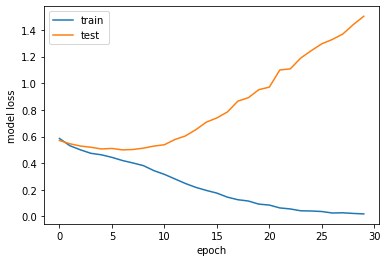

In [25]:
x15 = x[:,:-4]
(x_train, y_train) = (x15[:N_train], y[:N_train])
(x_test, y_test) = (x15[N_train:], y[N_train:])
print(f"Ratio between y_train labels sum and train samples: {y_train.sum() / N_train}")
print(f"Ratio between y_test  labels sum and test samples: {y_test.sum() / N_test}")
print(x)

np.random.seed(123)

model = Sequential()
L = 60

model.add(Dense(L,input_shape=(L,),activation = "relu"))
model.add(Dense(L/2,activation = "relu"))
model.add(Dense(L/4,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics= ["accuracy"])

fit = model.fit(x_train, y_train,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)


# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Final Test loss:', score[0])
print('Final Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [26]:
#sx15 = np.array([list(s) for s in sx])
sx15 = [n[:-1] for n in sx]
sx15[0]

'AAGGTCTGCCGGCCG'

In [27]:
augval15 = np.asarray([[[v[-i:] + v[:-i],vy] for i in range(0, 15, 3)] for v,vy in zip(sx15[:N_train],y[:N_train])]).reshape(12000,2)
augsx15 = augval15[:,0]
augy_train15 = augval15[:,1].astype(int)

In [28]:
augval15[:5]

array([['AAGGTCTGCCGGCCG', '1'],
       ['CCGAAGGTCTGCCGG', '1'],
       ['CGGCCGAAGGTCTGC', '1'],
       ['TGCCGGCCGAAGGTC', '1'],
       ['GTCTGCCGGCCGAAG', '1']], dtype='<U15')

In [29]:
augx_train15 = np.zeros((N_train*5,L))

for n in range(N_train*5):
    for i in range(15):
        augx_train15[n][i*4 + onehc[augsx15[n][i]]] = 1
aug_N_train = N_train*5

In [32]:
augx_train15.shape

(12000, 60)

In [33]:
fit_aug15 = model.fit(augx_train15, augy_train15,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)

Epoch 1/30
240/240 [==============================] - 1s 6ms/step - loss: 0.4603 - accuracy: 0.8103 - val_loss: 0.5505 - val_accuracy: 0.7717
Epoch 2/30
240/240 [==============================] - 1s 5ms/step - loss: 0.3627 - accuracy: 0.8378 - val_loss: 0.5420 - val_accuracy: 0.7750
Epoch 3/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3316 - accuracy: 0.8560 - val_loss: 0.5526 - val_accuracy: 0.7717
Epoch 4/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3070 - accuracy: 0.8662 - val_loss: 0.6192 - val_accuracy: 0.7700
Epoch 5/30
240/240 [==============================] - 1s 5ms/step - loss: 0.2848 - accuracy: 0.8767 - val_loss: 0.6139 - val_accuracy: 0.7767
Epoch 6/30
240/240 [==============================] - 1s 5ms/step - loss: 0.2659 - accuracy: 0.8887 - val_loss: 0.6598 - val_accuracy: 0.7783
Epoch 7/30
240/240 [==============================] - 1s 5ms/step - loss: 0.2507 - accuracy: 0.8942 - val_loss: 0.7214 - val_accuracy: 0.7750
Epoch 

19/19 [==============================] - 0s 5ms/step - loss: 1.4775 - accuracy: 0.7883
Final Test loss: 1.4774651527404785
Final Test accuracy: 0.7883333563804626


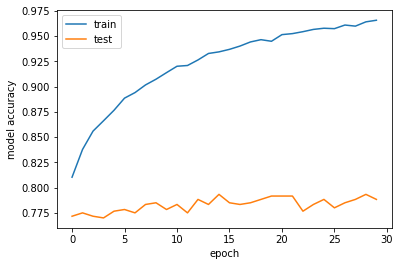

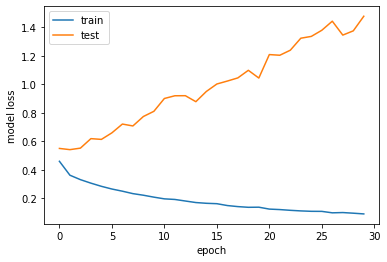

In [35]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Final Test loss:', score[0])
print('Final Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit_aug15.history['accuracy'])
plt.plot(fit_aug15.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit_aug15.history['loss'])
plt.plot(fit_aug15.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()